# Übung 1, Aufgabe 3: $\left(\mu,\sigma\right)$-effiziente Portfolios
## Import der Programmbibliotheken

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt # Darstellung von Grafiken
import scipy.optimize as sco # Zur Optimierung von Zielfunktionen
import pandas as pd # Einlesen, verwalten, modifizieren von Daten
import numpy as np # Ausführung mathematischer Operationen
import random # Generator für (Pseudo-)Zufallszahlen
import math # Ausführung mathematischer Operationen
import os # Systembefehle

In [ ]:
# Sicherstellung Replizierbarkeit
seed = 42
os.environ['PYTHONHASHSEED'] = str(seed)
random.seed(seed)
np.random.seed(seed)

# Grafikeinstellungen
plt.rcParams['figure.figsize'] = (8, 5)
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['figure.dpi'] = 100
plt.rcParams['font.size'] = 12
plt.rcParams['legend.title_fontsize'] = 12

## Datenverwaltung
### Einlesen der Daten

In [ ]:
# Daten lokal abrufen
"""
data_df = pd.read_csv('tr_eikon_eod_data.csv', # Bezeichung Datensatz
                      index_col=0, # Nummer der Spalte mit dem Index (Datum)
                      parse_dates=True).dropna() # Umwaldung Index in Datumsformat & Entfernung von Datenlücken
"""

# Daten von GitHub abrufen
data_df = pd.read_csv('https://raw.githubusercontent.com/yhilpisch/py4fi2nd/master/source/tr_eikon_eod_data.csv', # Bezeichung Datensatz
                      index_col=0, # Nummer der Spalte mit dem Index (Datum)
                      parse_dates=True).dropna() # Umwaldung Index in Datumsformat & Entfernung von Datenlücken
data_df

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-04,30.572827,30.950,20.88,133.90,173.08,113.33,1132.99,20.04,1.4411,1120.00,47.71,109.80
2010-01-05,30.625684,30.960,20.87,134.69,176.14,113.63,1136.52,19.35,1.4368,1118.65,48.17,109.70
2010-01-06,30.138541,30.770,20.80,132.25,174.26,113.71,1137.14,19.16,1.4412,1138.50,49.34,111.51
2010-01-07,30.082827,30.452,20.60,130.00,177.67,114.19,1141.69,19.06,1.4318,1131.90,49.10,110.82
2010-01-08,30.282827,30.660,20.83,133.52,174.31,114.57,1144.98,18.13,1.4412,1136.10,49.84,111.37
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-06-25,182.170000,98.390,50.71,1663.15,221.54,271.00,2717.07,17.33,1.1702,1265.00,22.01,119.89
2018-06-26,184.430000,99.080,49.67,1691.09,221.58,271.60,2723.06,15.92,1.1645,1258.64,21.95,119.26
2018-06-27,184.160000,97.540,48.76,1660.51,220.18,269.35,2699.63,17.91,1.1552,1251.62,21.81,118.58


### Datenauswahl

In [ ]:
# AAPL.O: Apple, Softwareentwickler
# MSFT.O: Microsoft Corporation, Technologieunternehmen
# GLD: SPDR Gold Shares, Börsengehandelter Fond
# SPY: S&P 500 ETF

symbols = ['AAPL.O', 'MSFT.O', 'GLD', 'SPY'] # Definition der zu wählenden Assets in einer Liste
number_of_assets = len(symbols) # Länge der Liste
data_selected = data_df[symbols] # Auswahl der Daten
data_selected

,AAPL.O,MSFT.O,GLD,SPY
Date,,,,
2010-01-04,30.572827,30.950,109.80,113.33
2010-01-05,30.625684,30.960,109.70,113.63
2010-01-06,30.138541,30.770,111.51,113.71
2010-01-07,30.082827,30.452,110.82,114.19
2010-01-08,30.282827,30.660,111.37,114.57
...,...,...,...,...
2018-06-25,182.170000,98.390,119.89,271.00
2018-06-26,184.430000,99.080,119.26,271.60
2018-06-27,184.160000,97.540,118.58,269.35


### Transformation der Daten

In [ ]:
log_returns = np.log(data_selected / data_selected.shift(1)).dropna()
log_returns

,AAPL.O,MSFT.O,GLD,SPY
Date,,,,
2010-01-05,0.001727,0.000323,-0.000911,0.002644
2010-01-06,-0.016034,-0.006156,0.016365,0.000704
2010-01-07,-0.001850,-0.010389,-0.006207,0.004212
2010-01-08,0.006626,0.006807,0.004951,0.003322
2010-01-11,-0.008861,-0.012802,0.013202,0.001396
...,...,...,...,...
2018-06-25,-0.014983,-0.020323,-0.003746,-0.013706
2018-06-26,0.012330,0.006988,-0.005269,0.002212
2018-06-27,-0.001465,-0.015665,-0.005718,-0.008319


### Grafische Datstellung

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fca81717f90>,
      dtype=object)

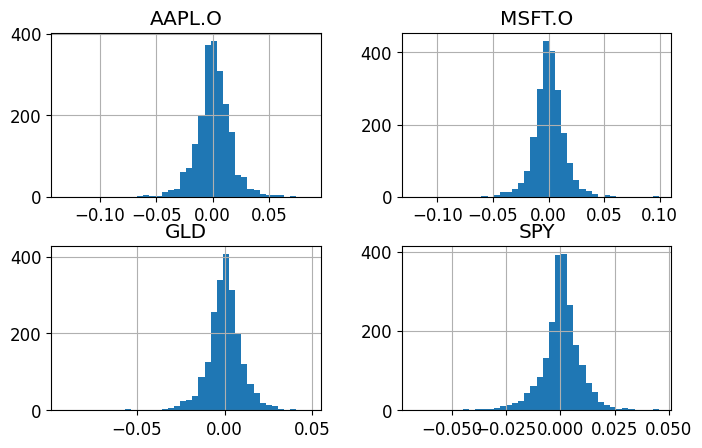

In [ ]:
log_returns.hist(bins=40)

## Bestimmung annualisierte Returns und Kovarianzmatrix

In [ ]:
log_returns_mean = log_returns.mean() * 252
log_returns_mean

AAPL.O    0.212359
MSFT.O    0.136648
GLD       0.009141
SPY       0.102928
dtype: float64

In [ ]:
log_returns_cov = log_returns.cov() * 252
log_returns_cov

,AAPL.O,MSFT.O,GLD,SPY
AAPL.O,0.063773,0.023427,0.001513,0.021039
MSFT.O,0.023427,0.050917,-0.000347,0.022244
GLD,0.001513,-0.000347,0.026209,0.000062
SPY,0.021039,0.022244,0.000062,0.021939


## Simulative Bestimmung der Portfolio-Gewichte
### Zufällige Gewichtung
#### Generierung zufälliger Gewichte

In [ ]:
# Generierung gleichverteilter Pseudo-Zufallszahlen im Bereich [0,1]
random_weights = np.random.random(number_of_assets)
random_weights

array([0.37454012, 0.95071431, 0.73199394, 0.59865848])

In [ ]:
# Normalisierung, damit Summe der Gewichte Eins beträgt
random_weights /= np.sum(random_weights)
random_weights

array([0.14102156, 0.35796222, 0.27560979, 0.22540643])

In [ ]:
random_weights.sum()

1.0

#### Bestimmung $\mu$ und $\sigma$

In [ ]:
# Annualisierter Portfolio-Return auf Basis zufälliger Gewichtung
print('Return: {}'.format((np.sum(log_returns.mean() * random_weights) * 252).round(3)))

Return: 0.105


In [ ]:
# Annualisierte Portfolio-Volatilität(std) auf Basis zufälliger Gewichtung
print('Volatility: {}'.format(round(math.sqrt(np.dot(random_weights.T, np.dot(log_returns.cov() * 252, random_weights))), 3)))

Volatility: 0.135


### Monte-Carlo-Simulation
#### Definition Hilfsfunktionen

In [ ]:
# Funktion zur Berechnung des Portfolio Returns
def get_portfolio_returns(weights_, returns_=log_returns):
    return np.sum(returns_.mean() * weights_) * 252

# Funktion zur Berechnung der Portfolio Volatilität
def get_portfolio_volatility(weights_, returns_=log_returns):
    return np.sqrt(np.dot(weights_.T, np.dot(returns_.cov() * 252, weights_)))

#### Simulation

In [ ]:
# Listen zum Speichern der Rechenergebnisse
portfolio_return_list = []
portfolio_volatility_list = []

# Schleife
for portfolio in range(2500):

    # Bestimmung zufälliger Portfolio Gewichte
    temp_weights = np.random.random(number_of_assets)
    temp_weights /= np.sum(temp_weights)

    # Bestimmung PF-Returns & PF-Volatilität
    # Speicherung in jeweilige Liste
    portfolio_return_list.append(get_portfolio_returns(temp_weights))
    portfolio_volatility_list.append(get_portfolio_volatility(temp_weights))

# Umwandlung des Listen-Objekts in ein Numpy-Array
portfolio_return_list = np.array(portfolio_return_list)
portfolio_volatility_list = np.array(portfolio_volatility_list)

# Ermittlung Sharpe-Ratio
sharpe_ratio = (portfolio_return_list / portfolio_volatility_list)

#### Grapfische Darstellung

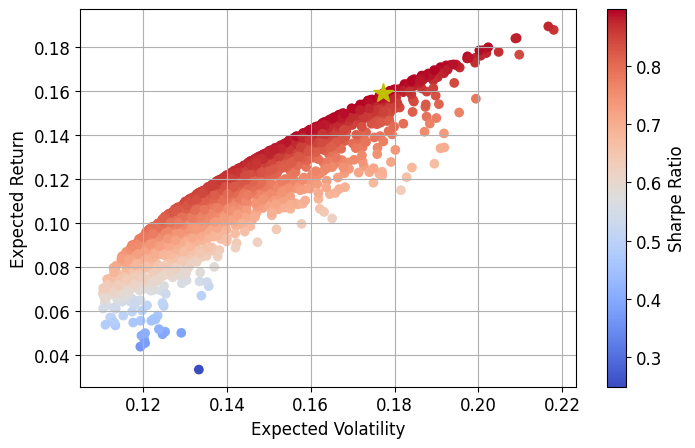

In [ ]:
fig = plt.figure()
# Ergebnnisse Monte-Carlo-Simulation
plt.scatter(portfolio_volatility_list, portfolio_return_list,
            c=sharpe_ratio,
            marker='o',
            cmap='coolwarm')
# Maximum Sharpe-Portfolio
plt.colorbar(label='Sharpe Ratio')
plt.plot(portfolio_volatility_list[sharpe_ratio.argmax()],
         portfolio_return_list[sharpe_ratio.argmax()],
         'y*',
         markersize=15.0)
# Übrige Einstellungen
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')
plt.grid()
plt.show()

## Portfolio-Optimierung und $\left(\mu,\sigma\right)$-effizienter Rand
### Maximum Sharpe-Portfolio & Minimum-Variance-Portfolio

In [ ]:
# Funktion zur Minimierung des negativen Sharpe-Ratios
# Hinweis: Vernachlässigung risikoloser Anlage
def min_sharpe(weights_):
    return -get_portfolio_returns(weights_) / get_portfolio_volatility(weights_)

#### Definition Nebenbedingungen, Startgewichte

In [ ]:
# Nebenbedingungen des Optimierungsproblems
boundarie_1 = tuple((0, 1) for x in range(number_of_assets)) # Gewichte im Bereich [0, 1]
constraint_1 = ({'type': 'eq', 'fun': lambda x:  np.sum(x) - 1}) # PF-Summe Eins

# Initialisierung Startgewichte (Gleichgewichtung)
equal_weights = np.array(number_of_assets * [1.0 / number_of_assets])

#### Portfolio-Optimierung

In [ ]:
# Maximum Sharpe-Portfolio
max_sharp = sco.minimize(min_sharpe,
                         equal_weights,
                         method='SLSQP',
                         bounds=boundarie_1,
                         constraints=constraint_1)

# Ausagbe Return und Volatilität
print('Return: {0}, Volatility: {1}'.format(get_portfolio_returns(max_sharp['x']).round(3), get_portfolio_volatility(max_sharp['x']).round(3)))

Return: 0.161, Volatility: 0.18


In [ ]:
# Minimum-Variance-Portfolio
min_var = sco.minimize(get_portfolio_volatility,
                       equal_weights,
                       method='SLSQP',
                       bounds=boundarie_1,
                       constraints=constraint_1)

# Ausagbe Return und Volatilität
print('Return: {0}, Volatility: {1}'.format(get_portfolio_returns(min_var['x']).round(3), get_portfolio_volatility(min_var['x']).round(3)))

Return: 0.06, Volatility: 0.109


### Effizienter Rand
#### Definition Nebenbedingungen

In [ ]:
# Nebenbedingungen des Optimierungsproblems
boundarie_2 = tuple((0, 1) for x in equal_weights) # Gewichte im Bereich [0, 1]
constraint_2 = ({'type': 'eq', 'fun': lambda x: get_portfolio_returns(x) - pf_return}, # Return Ziel
                 {'type': 'eq', 'fun': lambda x: np.sum(x) - 1}) # PF-Summe Eins

#### Portfolio-Optimierung

In [ ]:
# Vorgabe Returns
pf_returns = np.linspace(0.05, 0.2, 50)

# Liste zum Speichern der Rechenergebnisse (Volatilitäten)
pf_volatility_list = []

# Schleife
for pf_return in pf_returns:

    # Bestimmung minimaler Volatility für gegebenen Return
    pf_volatility = sco.minimize(get_portfolio_volatility,
                                 equal_weights,
                                 method='SLSQP',
                                 bounds=boundarie_2,
                                 constraints=constraint_2)
    pf_volatility_list.append(pf_volatility['fun'])

# Umwandlung  Listen-Objekts in ein Numpy-Array
pf_volatility_list = np.array(pf_volatility_list)

#### Grapfische Darstellung

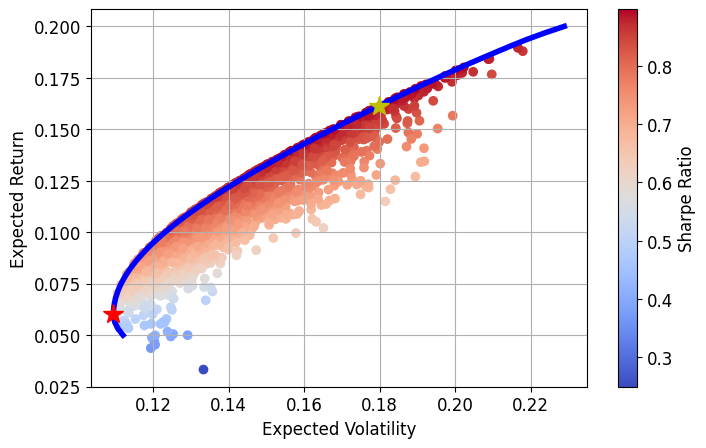

In [ ]:
fig = plt.figure()
# Ergebnnisse Monte-Carlo-Simulation
plt.scatter(portfolio_volatility_list, portfolio_return_list,
            c=sharpe_ratio,
            marker='o',
            cmap='coolwarm')
# Effizienter Rand
plt.plot(pf_volatility_list, pf_returns, 'b', lw=4.0)
# Maximum Sharpe-Portfolio
plt.plot(get_portfolio_volatility(max_sharp['x']),
         get_portfolio_returns(max_sharp['x']),
         'y*',
         markersize=15.0)
# Minimum-Variance-Portfolio
plt.plot(get_portfolio_volatility(min_var['x']),
         get_portfolio_returns(min_var['x']),
         'r*',
         markersize=15.0)
# Übrige Einstellungen
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')
plt.colorbar(label='Sharpe Ratio')
plt.grid()
plt.show()

***
Dieses Notebook (v1.0) basiert auf der Grundlage von:

Python for Finance (2nd ed.) - Mastering Data-Driven Finance
<br>
© Dr. Yves J. Hilpisch | The Python Quants GmbH
<br>
https://www.oreilly.com/library/view/python-for-finance/9781492024323/
<br>
https://github.com/yhilpisch/py4fi2nd/blob/master/code/ch13/13_a_statistics.ipynb